In [140]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt



In [111]:
df_train_est = pd.read_csv('train_est.csv')
df_train_est = df_train_est.rename(columns={'Unnamed: 0': 'date_forecast'})
df_train_obs = pd.read_csv('train_obs.csv')
df_train_obs = df_train_obs.rename(columns={'Unnamed: 0': 'date_forecast'})
df_test = pd.read_csv('X_test_A.csv')
df_test = df_test.rename(columns={'Unnamed: 0': 'date_forecast'})


In [112]:
df_train_est.set_index('date_forecast', inplace=True)

df_train_obs.set_index('date_forecast', inplace=True)

df_test.set_index('date_forecast', inplace=True)

In [113]:
features_name = [c for c in df_train_obs.columns if c != 'pv_measurement']
target = 'pv_measurement'
X = df_train_obs[features_name]
y = df_train_obs[target]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)
print(y_train)

date_forecast
2019-06-02 22:00:00      0.00
2019-06-02 23:00:00      0.00
2019-06-03 00:00:00      0.00
2019-06-03 01:00:00      0.00
2019-06-03 02:00:00     19.36
                        ...  
2022-06-19 05:00:00   1139.60
2022-06-19 06:00:00   2745.60
2022-06-19 07:00:00   3967.92
2022-06-19 08:00:00   4367.44
2022-06-19 09:00:00   4357.98
Name: pv_measurement, Length: 26700, dtype: float64


In [225]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train_v1,columns=X_train.columns,index=X_train.index)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns,index=X_test.index)

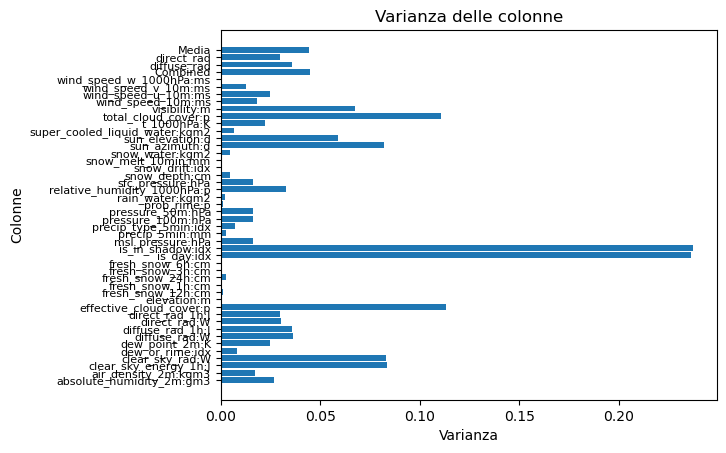

In [201]:
fig, ax = plt.subplots()

x = X_train.columns
y = scaled_X_train_v1.var(axis=0)
plt.barh(x, y)
plt.title('Varianza delle colonne')
plt.xlabel('Varianza')
plt.ylabel('Colonne')
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels


In [202]:
# Specifica il threshold per la varianza (ad esempio, 0.1)
threshold = 0.1

# Inizializza l'oggetto VarianceThreshold con il threshold specificato
variance_threshold = VarianceThreshold(threshold)
variance_threshold.fit(X)

# Applica la selezione di varianza al DataFrame
df_filtered = scaled_X_train_v1.iloc[:, variance_threshold.get_support(indices=True)]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [206]:
scaled_X_train.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,Combined,diffuse_rad,direct_rad,Media
count,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,...,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00,26700.00
mean,0.34,0.38,0.19,0.19,0.51,0.59,0.13,0.13,0.08,0.08,...,0.74,0.47,0.23,0.43,0.54,0.00,0.13,0.13,0.08,0.13
std,0.16,0.13,0.29,0.29,0.09,0.16,0.19,0.19,0.17,0.17,...,0.33,0.26,0.14,0.16,0.11,0.01,0.21,0.19,0.17,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.29,0.00,0.00,0.50,0.48,0.00,0.00,0.00,0.00,...,0.54,0.23,0.12,0.32,0.46,0.00,0.00,0.00,0.00,0.00
50%,0.31,0.37,0.01,0.01,0.50,0.59,0.01,0.02,0.00,0.00,...,0.92,0.52,0.20,0.41,0.54,0.00,0.00,0.02,0.00,0.01
75%,0.45,0.46,0.31,0.32,0.50,0.71,0.22,0.22,0.06,0.06,...,1.00,0.69,0.31,0.54,0.61,0.00,0.18,0.22,0.06,0.18
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [205]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)
# get importance
importance = rf.feature_importances_

NameError: name 'importanc' is not defined

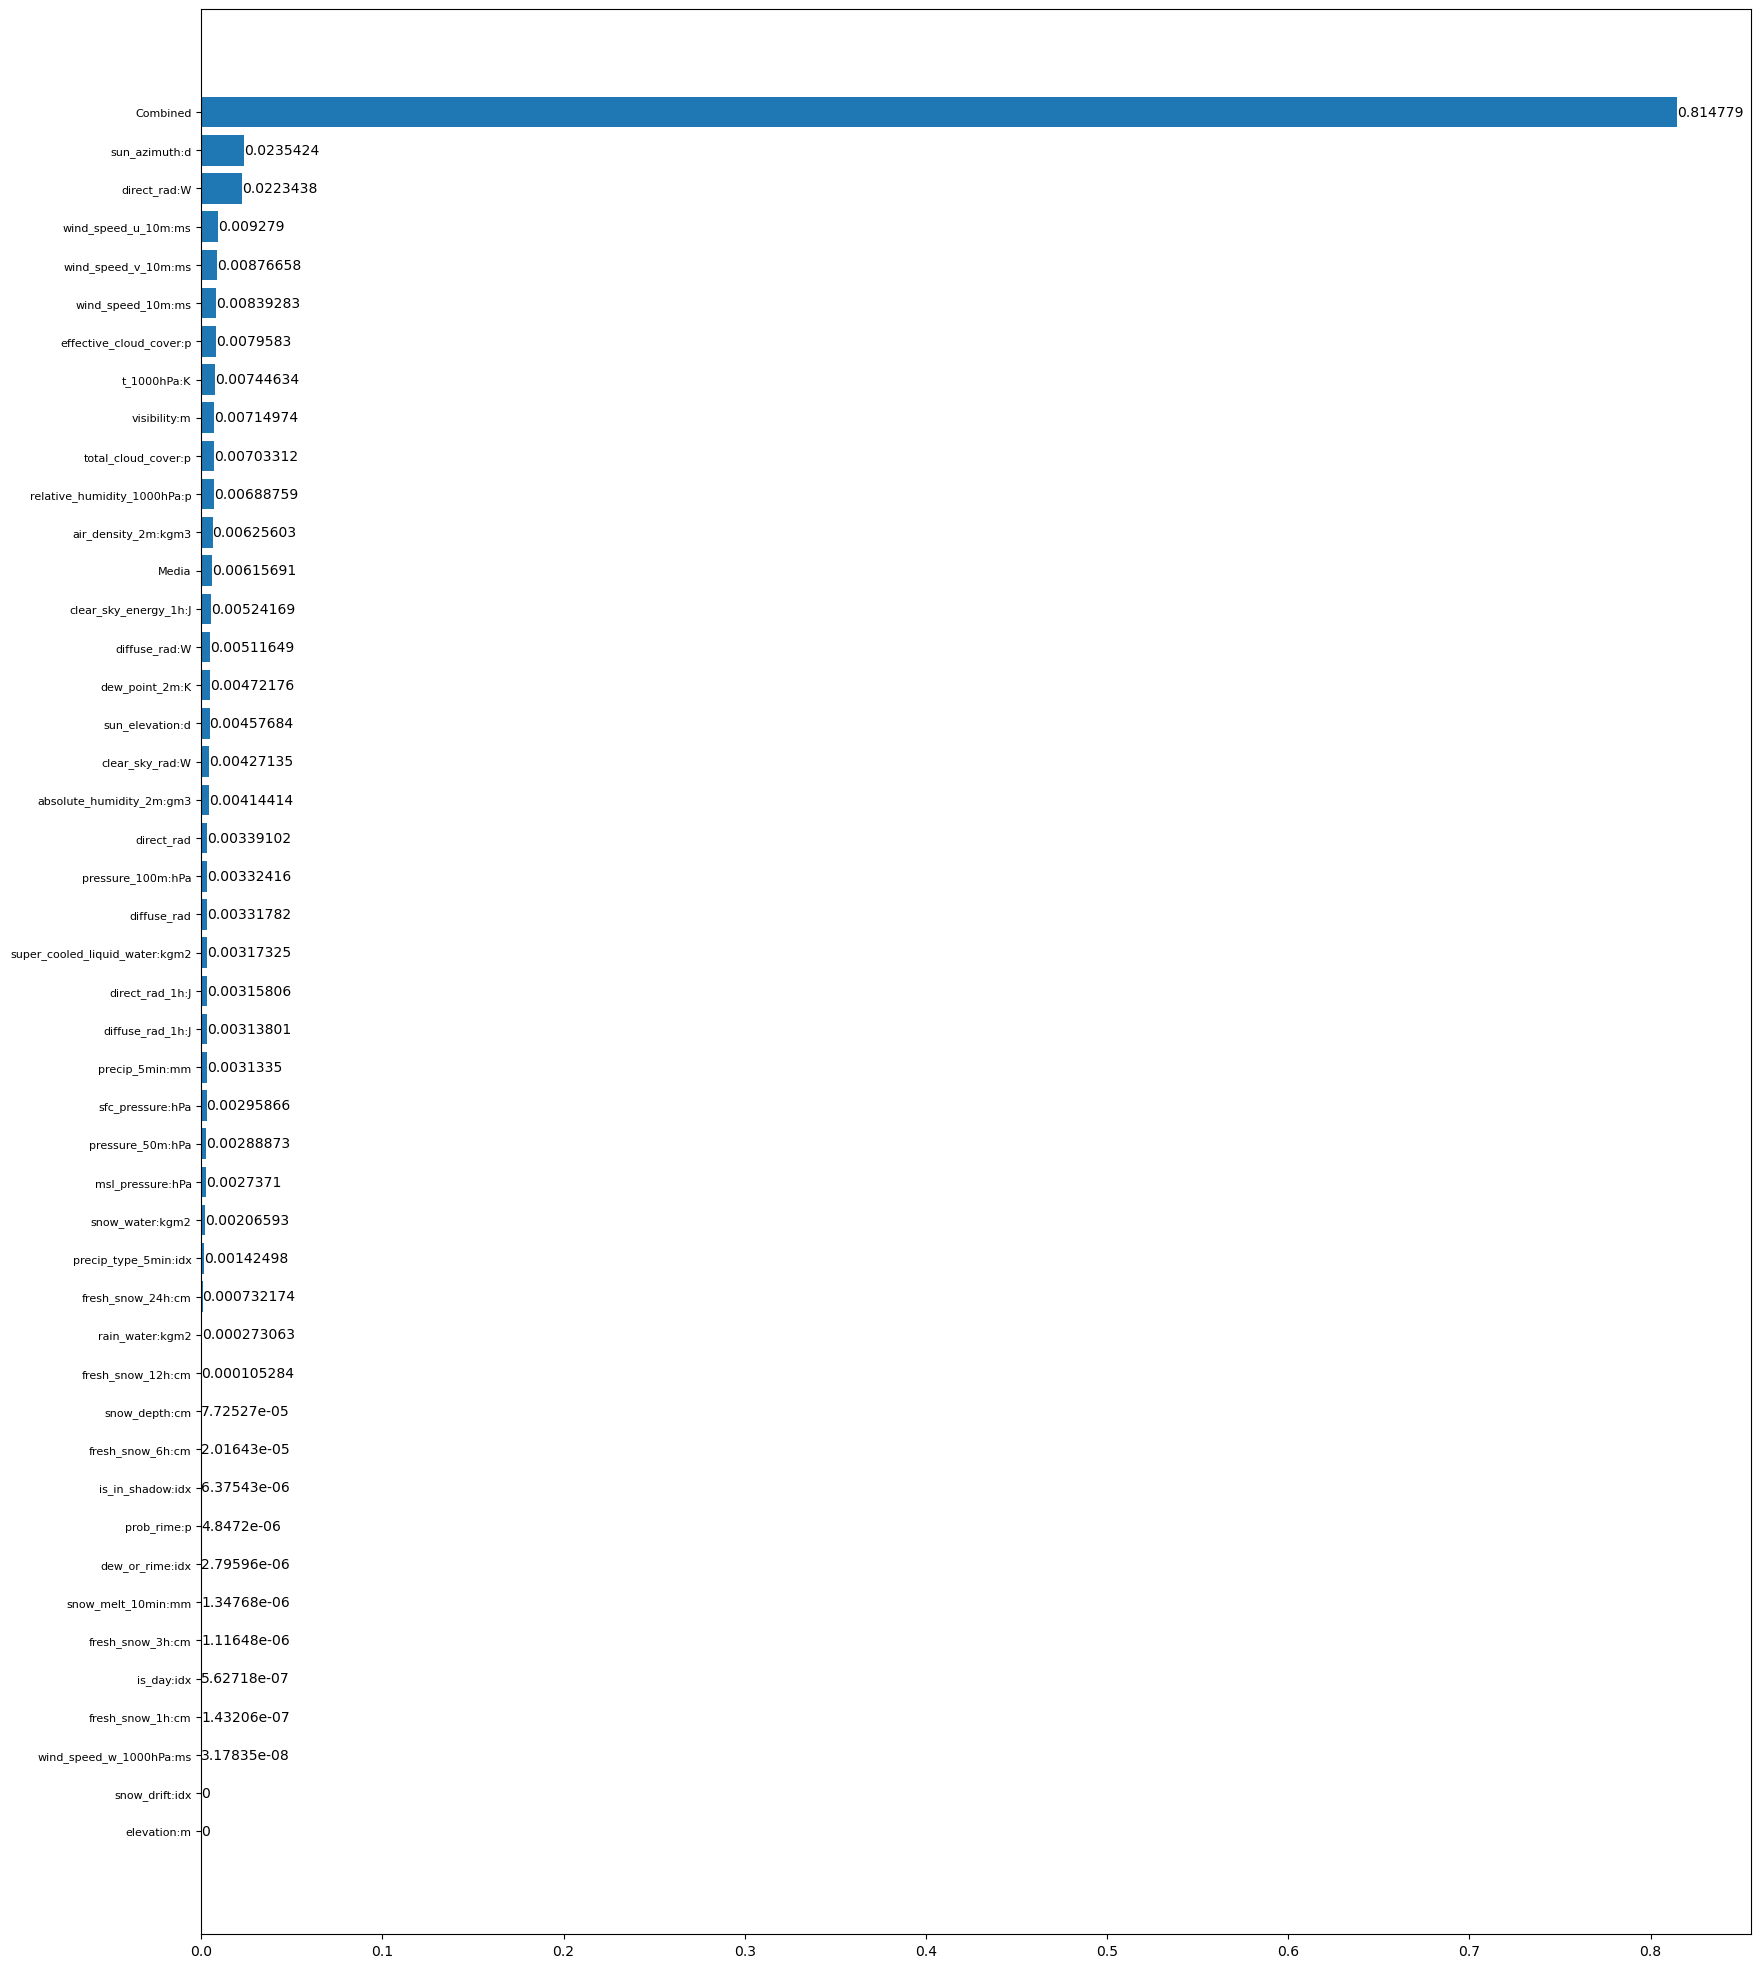

In [209]:
dataRF = pd.DataFrame()
dataRF['Feature_name'] = scaled_X_train.columns
dataRF['importance'] = importance
dataRF = dataRF.sort_values(by='importance',ascending = True)
plt.figure(figsize=(20, 25))  # width:20, height:3

plot = plt.barh(dataRF['Feature_name'],dataRF['importance'])
plt.bar_label(plot)
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels


In [174]:
X_train['diffuse_rad'] = X_train['diffuse_rad:W'] + X_train['diffuse_rad_1h:J']
X_train['direct_rad'] = X_train['direct_rad:W'] + X_train['direct_rad_1h:J']
X_train['direct_rad'] = X_train['direct_rad'].astype(float)
X_train['diffuse_rad'] = X_train['diffuse_rad'].astype(float)
display(X_train)
# Calcola la media tra le due colonne
X_train['Media'] = (X_train['direct_rad'] + X_train['diffuse_rad']) / 2

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,Combined,diffuse_rad,direct_rad,Media
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.70,1.23,0.00,0.00,0.00,280.30,0.00,0.00,0.00,0.00,...,100.00,40386.48,3.60,-3.57,-0.50,0.00,0.00,0.00,0.00,0.00
2019-06-02 23:00:00,7.70,1.22,0.00,0.00,0.00,280.30,0.00,0.00,0.00,0.00,...,100.00,33770.65,3.35,-3.35,0.28,0.00,0.00,0.00,0.00,0.00
2019-06-03 00:00:00,7.88,1.22,0.00,0.00,0.00,280.65,0.00,0.00,0.00,0.00,...,100.00,13595.50,3.05,-2.95,0.75,0.00,0.00,0.00,0.00,0.00
2019-06-03 01:00:00,8.43,1.22,208.65,0.75,0.00,281.68,0.30,526.77,0.00,0.00,...,100.00,2321.85,2.73,-2.60,0.88,0.00,0.30,527.07,0.00,263.54
2019-06-03 02:00:00,8.95,1.22,32468.15,23.10,0.00,282.50,11.97,22068.95,0.15,282.98,...,99.22,11634.80,2.55,-2.35,0.92,0.00,12.12,22080.92,283.12,11182.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-19 05:00:00,7.88,1.23,929470.90,321.30,0.00,280.55,101.40,318362.88,187.43,531353.00,...,94.38,27293.45,1.57,1.27,0.95,0.00,288.83,318464.28,531540.43,425002.35
2022-06-19 06:00:00,7.80,1.23,1391187.20,451.55,0.00,280.50,115.28,389919.56,282.50,845832.60,...,73.65,32421.20,1.27,1.15,0.47,0.00,397.77,390034.84,846115.10,618074.97
2022-06-19 07:00:00,7.45,1.22,1852650.20,575.75,0.00,279.93,133.12,447096.97,337.32,1115633.10,...,44.02,40121.27,1.07,1.05,0.28,0.00,470.45,447230.09,1115970.43,781600.26


In [171]:
X_test['diffuse_rad'] = X_test['diffuse_rad:W'] + X_test['diffuse_rad_1h:J']
X_test['direct_rad'] = X_test['direct_rad:W'] + X_test['direct_rad_1h:J']
X_test['direct_rad'] = X_test['direct_rad'].astype(float)
X_test['diffuse_rad'] = X_test['diffuse_rad'].astype(float)

# Calcola la media tra le due colonne
X_test['Media'] = (X_test['direct_rad'] + X_test['diffuse_rad']) / 2

In [168]:
rf.fit(X_train,y_train)
importance = rf.feature_importances_

,Feature_name,importance
11,elevation:m,0.00
29,snow_drift:idx,0.00
41,wind_speed_w_1000hPa:ms,0.00
13,fresh_snow_1h:cm,0.00
17,is_day:idx,0.00
15,fresh_snow_3h:cm,0.00
30,snow_melt_10min:mm,0.00
4,dew_or_rime:idx,0.00
24,prob_rime:p,0.00
18,is_in_shadow:idx,0.00


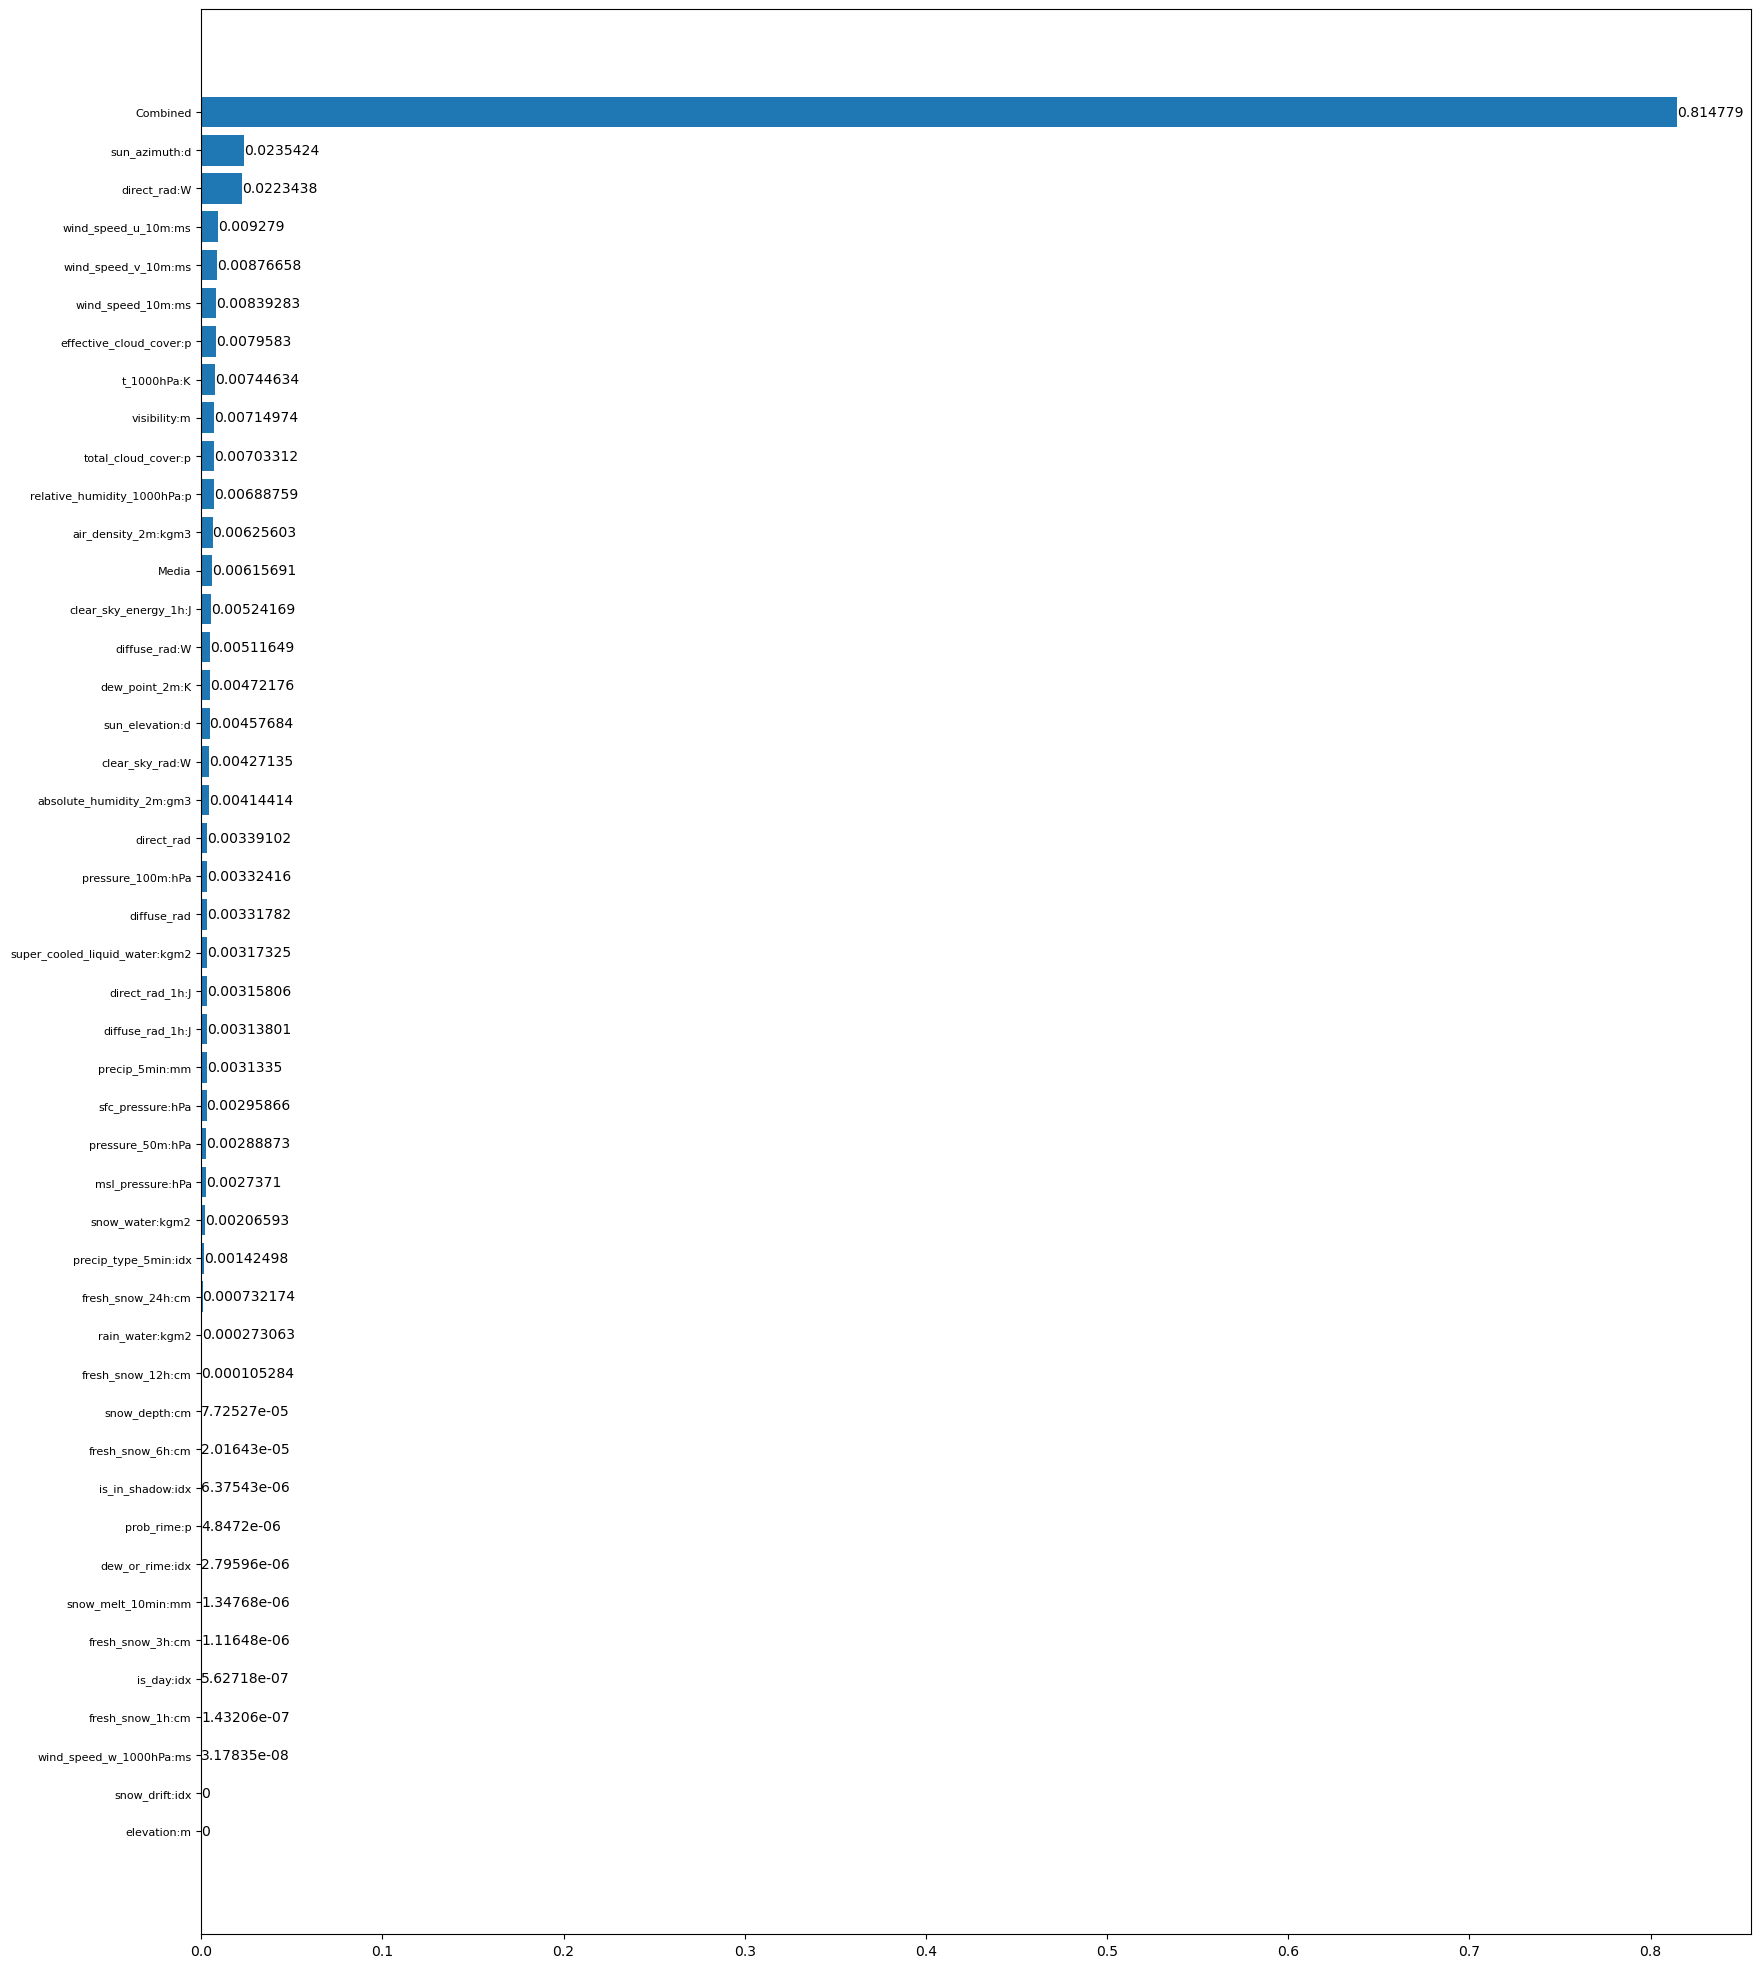

In [223]:
dataRF = pd.DataFrame()
dataRF['Feature_name'] = X_train.columns
dataRF['importance'] = importance
dataRF = dataRF.sort_values(by='importance',ascending = True)
display(dataRF)
plt.figure(figsize=(20, 25))  # width:20, height:3

plot = plt.barh(dataRF['Feature_name'],dataRF['importance'])
plt.bar_label(plot)
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels

In [224]:
# Specifica il threshold
threshold = 0.01

# Seleziona le righe in cui il valore nella colonna 'Colonna1' supera il threshold
dataRF = dataRF[dataRF['importance'] > threshold]

In [226]:
def create_sequences(X, y, time_steps):
    X_sequences, y_targets = [], []
    for i in range(len(X) - time_steps):
        X_sequences.append(X[i:i+time_steps])
        y_targets.append(y[i+time_steps])
    return np.array(X_sequences), np.array(y_targets)

# Imposta il numero di passaggi temporali (time steps)
time_steps = 1  # Personalizza in base alle tue esigenze

# Crea le sequenze e i target per addestramento
X_train_sequences, y_train_sequences = create_sequences(scaled_X_train[dataRF['Feature_name']], y_train, time_steps)
X_test_sequences, y_test_sequences = create_sequences(scaled_X_test[dataRF['Feature_name']], y_test, time_steps)

# Verifica le dimensioni dei dati
print("Dimensioni dei dati di addestramento:", X_train_sequences.shape, y_train_sequences.shape)
print("Dimensioni dei dati di test:", X_test_sequences.shape, y_test_sequences.shape)


Dimensioni dei dati di addestramento: (26699, 1, 3) (26699,)
Dimensioni dei dati di test: (2966, 1, 3) (2966,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Crea il modello LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, X_train_sequences.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(units=64,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.1), loss='mae')

# Addestra il modello
model.fit(X_train_sequences, y_train_sequences, epochs=50, batch_size=8, verbose=2)

# Valuta il modello
y_pred = model.predict(X_test_sequences)



Epoch 1/50
3338/3338 - 7s - loss: 277.8974 - 7s/epoch - 2ms/step
Epoch 2/50
3338/3338 - 5s - loss: 254.4914 - 5s/epoch - 1ms/step
Epoch 3/50
3338/3338 - 5s - loss: 250.8219 - 5s/epoch - 1ms/step
Epoch 4/50
3338/3338 - 5s - loss: 246.5893 - 5s/epoch - 2ms/step
Epoch 5/50
3338/3338 - 5s - loss: 244.5663 - 5s/epoch - 1ms/step
Epoch 6/50
3338/3338 - 5s - loss: 242.6149 - 5s/epoch - 2ms/step
Epoch 7/50
3338/3338 - 5s - loss: 243.2918 - 5s/epoch - 1ms/step
Epoch 8/50
3338/3338 - 5s - loss: 241.7904 - 5s/epoch - 1ms/step
Epoch 9/50
3338/3338 - 5s - loss: 240.7106 - 5s/epoch - 1ms/step
Epoch 10/50
3338/3338 - 5s - loss: 239.8096 - 5s/epoch - 1ms/step
Epoch 11/50
3338/3338 - 5s - loss: 240.2064 - 5s/epoch - 1ms/step
Epoch 12/50
3338/3338 - 5s - loss: 238.4964 - 5s/epoch - 2ms/step
Epoch 13/50
3338/3338 - 5s - loss: 239.5216 - 5s/epoch - 2ms/step
Epoch 14/50
3338/3338 - 6s - loss: 238.3542 - 6s/epoch - 2ms/step
Epoch 15/50
3338/3338 - 5s - loss: 238.5242 - 5s/epoch - 2ms/step
Epoch 16/50
3338/33

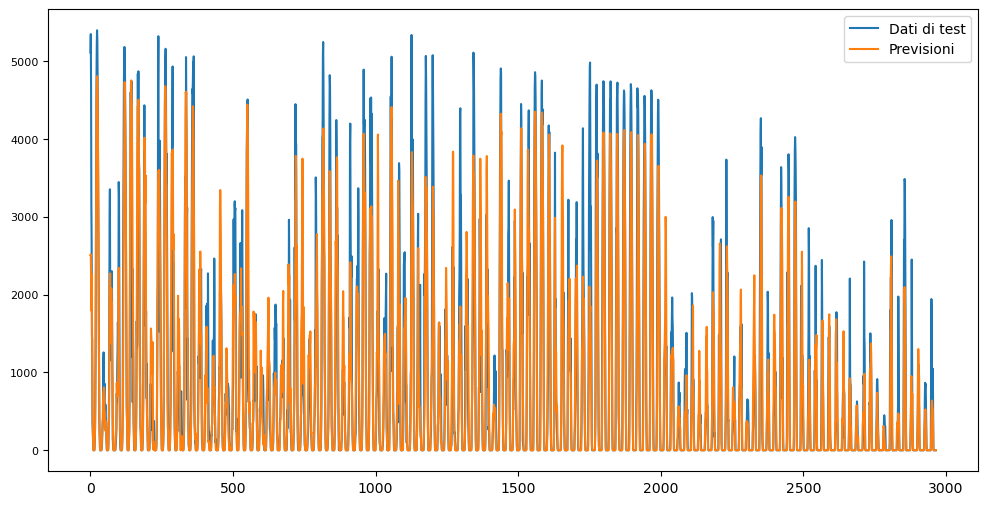

In [228]:
# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.plot( y_test_sequences, label="Dati di test")
plt.plot( y_pred, label="Previsioni")
plt.legend()
plt.show()